<a href="https://colab.research.google.com/github/rkdwogns/TIS/blob/main/%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
dense = Dense(units=1, input_shape=[1])
model = Sequential([dense])
model.compile(optimizer='RMSProp', loss='mean_squared_error')
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)
model.fit(xs, ys, epochs=500)
print(model.predict([10.0]))

Epoch 1/500
1/1 [==============================] - 0s 248ms/step - loss: 57.0462
Epoch 2/500
1/1 [==============================] - 0s 12ms/step - loss: 56.9104
Epoch 3/500
1/1 [==============================] - 0s 10ms/step - loss: 56.8121
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 56.7299
Epoch 5/500
1/1 [==============================] - 0s 8ms/step - loss: 56.6570
Epoch 6/500
1/1 [==============================] - 0s 6ms/step - loss: 56.5903
Epoch 7/500
1/1 [==============================] - 0s 6ms/step - loss: 56.5280
Epoch 8/500
1/1 [==============================] - 0s 6ms/step - loss: 56.4689
Epoch 9/500
1/1 [==============================] - 0s 12ms/step - loss: 56.4125
Epoch 10/500
1/1 [==============================] - 0s 7ms/step - loss: 56.3581
Epoch 11/500
1/1 [==============================] - 0s 7ms/step - loss: 56.3053
Epoch 12/500
1/1 [==============================] - 0s 7ms/step - loss: 56.2540
Epoch 13/500
1/1 [==========================

In [4]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [5]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [8]:
from sklearn.linear_model import SGDClassifier

In [9]:
import sklearn
print(sklearn.__version__)

1.0.2


In [10]:
# 사이킷런 1.1.0 버전 이하일 경우 'log_loss'를 'log'로 바꾸어 주세요.
# sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [11]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [12]:
import numpy as np

# 사이킷런 1.1 버전에서는 SGDClassifier의 loss 매개변수 중 
# 로지스틱 손실을 의미하는 'log'가 'log_loss'로 바뀐다는 경고가 발생합니다.
# 사이킷런 1.1 이상을 사용하는 경우 loss='log'를 loss='log_loss'로 변경하세요.
sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [13]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

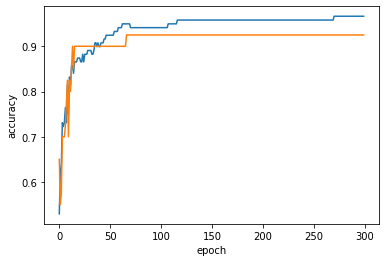

In [14]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()